# Modelo de Autômato Finito e Conversões: ε-AFN-AFN e AFN-AFD
---

# Sumário

1. [Conversão: ε-AFN-AFN](#eAFN-AFN)
2. [Modelo em JSON](#automato-json)



# Conversão: ε-AFN-AFN <a id="eAFN-AFN"></a>


# Modelo em JSON <a id="automato-json"></a>

- Modelo ilustrado:

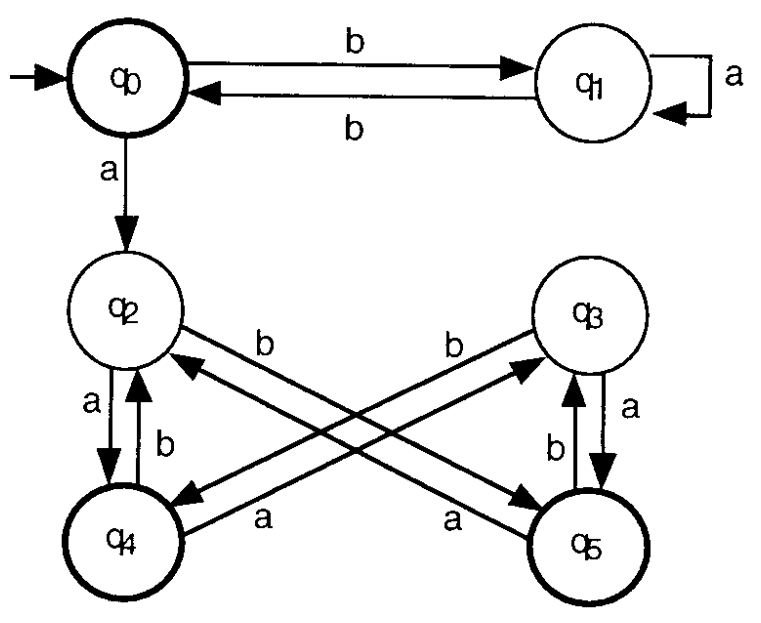

  
- Modelo em formato **JSON**:
```json
{
  "estados": ["q0", "q1", "q2", "q3", "q4", "q5"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["q0", "q4", "q5"],
  "transicoes": {
    "q0": {"a": "q2", "b": "q1"},
    "q1": {"a": "q2", "b": "q0"},
    "q2": {"a": "qf", "b": "qf"},
    "q3": {"a": "qf", "b": "qf"},
    "q4": {"a": "qf", "b": "qf"},
    "q5": {"a": "qf", "b": "qf"},
  }
}
```

In [7]:
import os

os.environ["PATH"] += r";C:\Program Files\Graphviz\bin"


In [ ]:
import json

automato = {
  "estados": ["q0", "q1", "q2", "q3", "q4", "q5", "qf"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["q0", "q4", "q5"],
  "transicoes": {
    "q0": {"a": "q2", "b": "q1"},
    "q1": {"a": "q2", "b": "q0"},
    "q2": {"a": "qf", "b": "qf"},
    "q3": {"a": "qf", "b": "qf"},
    "q4": {"a": "qf", "b": "qf"},
    "q5": {"a": "qf", "b": "qf"},
    "qf": {"a": "qf", "b": "qf"}
  }
}

def minimizar_afd(automato):
    """Realiza a minimização de um AFD e retorna o AFD mínimo."""
    estados = automato["estados"]
    alfabeto = automato["alfabeto"]
    transicoes = automato["transicoes"]
    finais = set(automato["estados_finais"])
    

    particoes = [finais, set(estados) - finais]
    
    mudou = True
    while mudou:
        mudou = False
        novas_particoes = []
        for grupo in particoes:
            representativos = {}
            for estado in grupo:
                assinatura = tuple(
                    next((i for i, p in enumerate(particoes) if transicoes.get(estado, {}).get(simbolo) in p), None)
                    for simbolo in alfabeto
                )
                if assinatura not in representativos:
                    representativos[assinatura] = set()
                representativos[assinatura].add(estado)
            novas_particoes.extend(representativos.values())
            if len(representativos) > 1:
                mudou = True
        particoes = novas_particoes
    

    mapa_estado = {}
    novos_estados = []
    for i, grupo in enumerate(particoes):
        nome_grupo = "_".join(sorted(grupo))
        novos_estados.append(nome_grupo)
        for estado in grupo:
            mapa_estado[estado] = nome_grupo
    
    novo_inicial = mapa_estado[automato["estado_inicial"]]
    novos_finais = list({mapa_estado[e] for e in finais})
    
    novas_transicoes = {}
    for grupo in particoes:
        representativo = next(iter(grupo))
        novo_estado = mapa_estado[representativo]
        novas_transicoes[novo_estado] = {}
        for simbolo in alfabeto:
            destino = transicoes.get(representativo, {}).get(simbolo)
            if destino:
                novas_transicoes[novo_estado][simbolo] = mapa_estado[destino]
    
    return {
        "estados": novos_estados,
        "alfabeto": alfabeto,
        "estado_inicial": novo_inicial,
        "estados_finais": novos_finais,
        "transicoes": novas_transicoes
    }

afd_minimo = minimizar_afd(automato)
print(json.dumps(afd_minimo, indent=2, ensure_ascii=False))


{
  "estados": [
    "q0",
    "q4_q5",
    "q1",
    "q2_q3_qf"
  ],
  "alfabeto": [
    "a",
    "b"
  ],
  "estado_inicial": "q0",
  "estados_finais": [
    "q0",
    "q4_q5"
  ],
  "transicoes": {
    "q0": {
      "a": "q2_q3_qf",
      "b": "q1"
    },
    "q4_q5": {
      "a": "q2_q3_qf",
      "b": "q2_q3_qf"
    },
    "q1": {
      "a": "q2_q3_qf",
      "b": "q0"
    },
    "q2_q3_qf": {
      "a": "q2_q3_qf",
      "b": "q2_q3_qf"
    }
  }
}


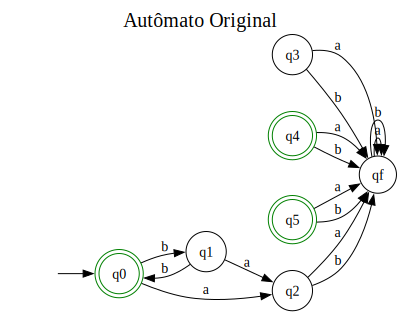

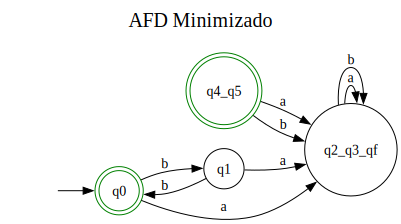

In [ ]:
import os
from graphviz import Digraph
import json


os.environ["PATH"] += r";C:\Program Files\Graphviz\bin"


def desenhar_afd(afd, titulo="Autômato"):
    g = Digraph(format="png")
    g.attr(rankdir='LR', label=titulo, labelloc='t', fontsize='20')
    
    for estado in afd["estados"]:
        if estado in afd["estados_finais"]:
            g.node(estado, shape='doublecircle', color='green')
        else:
            g.node(estado, shape='circle')
    

    g.attr('node', shape='none')
    g.edge('', afd["estado_inicial"])
    

    for origem, trans in afd["transicoes"].items():
        for simbolo, destino in trans.items():
            g.edge(origem, destino, label=simbolo)
    
    return g

def minimizar_afd(automato):
    estados = automato["estados"]
    alfabeto = automato["alfabeto"]
    transicoes = automato["transicoes"]
    finais = set(automato["estados_finais"])
    
    particoes = [finais, set(estados)-finais]
    
    mudou = True
    while mudou:
        mudou = False
        novas_particoes = []
        for grupo in particoes:
            representativos = {}
            for estado in grupo:
                assinatura = tuple(
                    next((i for i, p in enumerate(particoes) if transicoes.get(estado, {}).get(s) in p), None)
                    for s in alfabeto
                )
                if assinatura not in representativos:
                    representativos[assinatura] = set()
                representativos[assinatura].add(estado)
            novas_particoes.extend(representativos.values())
            if len(representativos) > 1:
                mudou = True
        particoes = novas_particoes

    mapa_estado = {}
    novos_estados = []
    for grupo in particoes:
        nome_grupo = "_".join(sorted(grupo))
        novos_estados.append(nome_grupo)
        for estado in grupo:
            mapa_estado[estado] = nome_grupo
    
    novo_inicial = mapa_estado[automato["estado_inicial"]]
    novos_finais = list({mapa_estado[e] for e in finais})
    
    novas_transicoes = {}
    for grupo in particoes:
        rep = next(iter(grupo))
        novo_estado = mapa_estado[rep]
        novas_transicoes[novo_estado] = {}
        for simbolo in alfabeto:
            destino = transicoes.get(rep, {}).get(simbolo)
            if destino:
                novas_transicoes[novo_estado][simbolo] = mapa_estado[destino]
    
    return {
        "estados": novos_estados,
        "alfabeto": alfabeto,
        "estado_inicial": novo_inicial,
        "estados_finais": novos_finais,
        "transicoes": novas_transicoes
    }

automato_original = {
  "estados": ["q0", "q1", "q2", "q3", "q4", "q5", "qf"],
  "alfabeto": ["a", "b"],
  "estado_inicial": "q0",
  "estados_finais": ["q0", "q4", "q5"],
  "transicoes": {
    "q0": {"a": "q2", "b": "q1"},
    "q1": {"a": "q2", "b": "q0"},
    "q2": {"a": "qf", "b": "qf"},
    "q3": {"a": "qf", "b": "qf"},
    "q4": {"a": "qf", "b": "qf"},
    "q5": {"a": "qf", "b": "qf"},
    "qf": {"a": "qf", "b": "qf"}
  }
}


afd_minimo = minimizar_afd(automato_original)


g_original = desenhar_afd(automato_original, "Autômato Original")
g_minimo = desenhar_afd(afd_minimo, "AFD Minimizado")


from IPython.display import display
display(g_original)
display(g_minimo)
